# ECE 140: Lab 4 Part Two

## Problem Statement:

Our question to answer is if we can predict the probability that a person has Parkinson's disease with audio data

## Method:

We will perform classification algorithms on a dataset that contains audio data of people as well as if they have PD

## Code:

In [22]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
df = pd.read_csv('parkinsons.data')
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5    phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6    phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7    phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8    phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9    phon_R01_S02_4       95.056       120.103        91.226         0.00532   
10   phon_R01_S02_5       88.333       112.240        84.072         0.00505   
11   phon_R01_S02_6       91.904       115.871        86.292         0.00540   
12   phon_R01_S04_1      136.926       159.866       131.276         0.00293   
13   phon_R01_S04_2      139.173       179.139        76.556         0.00390   
14   phon_R01_S04_3      152.845       163.305        75.836         0.00294   
15   phon_R01_S04_4      142.167       217.455        83.159         0.00369   
16   phon_R01_S04_5      144.188       349.259        82.764         0.00544   
17   phon_R01_S04_6      168.778       232.181        75.603         0.00718   
18   phon_R01_S05_1      153.046       175.829        68.623         0.00742   
19   phon_R01_S05_2      156.405       189.398       142.822         0.00768   
20   phon_R01_S05_3      153.848       165.738        65.782         0.00840   
21   phon_R01_S05_4      153.880       172.860        78.128         0.00480   
22   phon_R01_S05_5      167.930       193.221        79.068         0.00442   
23   phon_R01_S05_6      173.917       192.735        86.180         0.00476   
24   phon_R01_S06_1      163.656       200.841        76.779         0.00742   
25   phon_R01_S06_2      104.400       206.002        77.968         0.00633   
26   phon_R01_S06_3      171.041       208.313        75.501         0.00455   
27   phon_R01_S06_4      146.845       208.701        81.737         0.00496   
28   phon_R01_S06_5      155.358       227.383        80.055         0.00310   
29   phon_R01_S06_6      162.568       198.346        77.630         0.00502   
..              ...          ...           ...           ...             ...   
165  phon_R01_S42_1      236.200       244.663       102.137         0.00277   
166  phon_R01_S42_2      237.323       243.709       229.256         0.00303   
167  phon_R01_S42_3      260.105       264.919       237.303         0.00339   
168  phon_R01_S42_4      197.569       217.627        90.794         0.00803   
169  phon_R01_S42_5      240.301       245.135       219.783         0.00517   
170  phon_R01_S42_6      244.990       272.210       239.170         0.00451   
171  phon_R01_S43_1      112.547       133.374       105.715         0.00355   
172  phon_R01_S43_2      110.739       113.597       100.139         0.00356   
173  phon_R01_S43_3      113.715       116.443        96.913         0.00349   
174  phon_R01_S43_4      117.004       144.466        99.923         0.00353   
175  phon_R01_S43_5      115.380       123.109       108.634         0.00332   
176  phon_R01_S43_6      116.388       129.038       108.970         0.00346   
177  phon_R01_S44_1      151.737       190.204       129.859         0.00314   
178  phon_R01_S44_2      148.790       158.359       138.990         0.00309   
179  phon_R01_S44_3      148.143       155.982       135.041         0.00392   
180  phon_R01_S44_4      150.440       163.441       144.736         0.00396   
181  phon_R01_S44_5      148.462       161.078       141.998         0.00397   
182  phon_R01_S44_6      149.818       163.417       144.786         0.00336   
183  phon_R01_S

In [4]:
# this value == 1 if the person has Parkinson's, 0 if they do not
# extract our labels

y = df['status'] 

In [5]:
df = df.drop(['name', 'status'], axis=1) # Separate features from label

In [6]:
X = df.as_matrix() # Convert the dataframe to a numpy array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [108]:
X_train

array([[1.200780e+02, 1.266320e+02, 1.056670e+02, ..., 1.959760e-01,
        2.108873e+00, 1.835720e-01],
       [1.975690e+02, 2.176270e+02, 9.079400e+01, ..., 1.645290e-01,
        2.882450e+00, 2.028790e-01],
       [1.679300e+02, 1.932210e+02, 7.906800e+01, ..., 2.623840e-01,
        2.916777e+00, 2.856950e-01],
       ...,
       [1.190310e+02, 1.275330e+02, 1.092160e+02, ..., 1.529410e-01,
        2.328513e+00, 1.128560e-01],
       [1.163420e+02, 5.812890e+02, 9.424600e+01, ..., 1.166360e-01,
        2.152083e+00, 1.388680e-01],
       [1.125470e+02, 1.333740e+02, 1.057150e+02, ..., 2.188850e-01,
        2.193412e+00, 1.603760e-01]])

In [109]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [110]:
pred = clf.predict(X_test)

In [111]:
score = clf.score(X_test, y_test)

In [112]:
score

0.8461538461538461

## Result:

Through logistic regression alone, we were able to predict Parkinson's likelihood with 84% accuracy!
One follow up question that comes to mind is with so many features in the dataset, which ones are relevant? To determine this, we will find which features are most telling of whether someone has Parkinson's or not.

[0.1082066  0.02751193 0.09734547 0.02492183 0.05112558 0.0289482
 0.06153296 0.03383897 0.02025656 0.06659514 0.03900748 0.03321655
 0.03567752 0.02910226 0.03964849 0.04340229 0.04762969 0.06848916
 0.09137258 0.05217072]


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


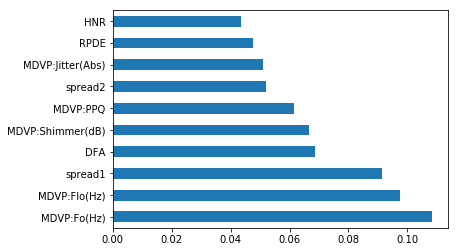

In [28]:
# Determine which features are most relevant for prediction with Tree Based Classification

model = ExtraTreesClassifier()
X = df.iloc[:,0:20]  # independent columns
model.fit(X,y)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

MDVP:Fo(Hz) refers to the average vocal fundamental frequency

MDVP:Flo(Hz) refers to the minimum vocal fundamental frequency

It would appear that vocal fundamental frequency has the largest impact in predicting if a person has Parkinson's.